# Baseball Case Study
## Problem Statement:<br>
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. <br>

-- **Input features:** Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors<br>

-- **Output: Number of predicted wins (W)**

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("baseball.csv", names  = ['Wins','Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks', 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs', 'Earned_Run_Average','Complete_Game', 'Shutouts', 'Saves', 'Errors'],skiprows=[0])

Imported Libraries and data. I have renamed the names of the columns for our convenience. Let's take a look at the data.

In [3]:
df.head()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Game,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At_Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Homeruns            30 non-null     int64  
 7   Walks               30 non-null     int64  
 8   Strikeouts          30 non-null     int64  
 9   Stolen_Bases        30 non-null     int64  
 10  Runs_Allowed        30 non-null     int64  
 11  Earned_Runs         30 non-null     int64  
 12  Earned_Run_Average  30 non-null     float64
 13  Complete_Game       30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

There are 17 columns with our target feature (Wins). There are just 30 entries or rows. Apart from Earned_Run_Average all the features are in Integer data type and Earned_Run_Average in float. There are no Null vaues in the data.

In [5]:
#Statistical summary
df.describe()

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average,Complete_Game,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Homeruns have little high difference in it's mean and median. <br>
Saves has a big difference in 75th percentile and maximum value. Same goes with Shutouts, Complete_Game, Earned_Runs, Runs_Allowed, Stolen_Bases, Strikeouts.

# EDA (Let's look at each columns.)

<AxesSubplot:xlabel='Wins', ylabel='Count'>

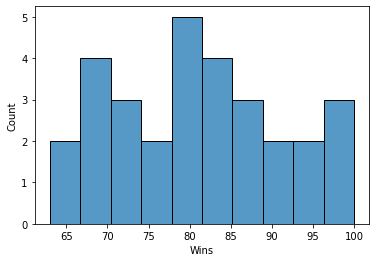

In [6]:
sns.histplot(df['Wins'], bins=10)

1) I created 10 bins as we have only 30 entries. Each bin has 3 row values.<br>
2) This shows that the Wins range from 63 to 100.

<AxesSubplot:xlabel='Runs', ylabel='Count'>

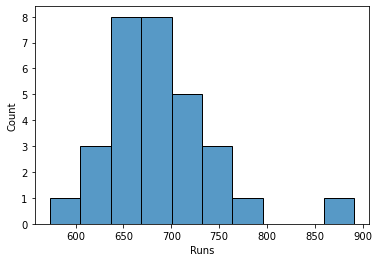

In [7]:
sns.histplot(df['Runs'], bins=10)

1) Most runs scored are between 640 and 760.<br>
2) There is a match that has highest score of 891

<AxesSubplot:xlabel='At_Bats', ylabel='Count'>

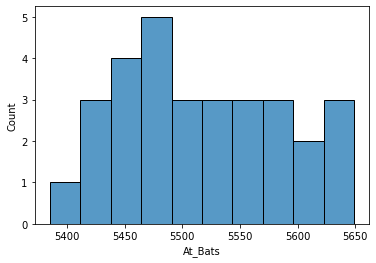

In [8]:
sns.histplot(df['At_Bats'], bins=10)

At_Bats values range from 5385 to 5650.

<AxesSubplot:xlabel='Hits', ylabel='Count'>

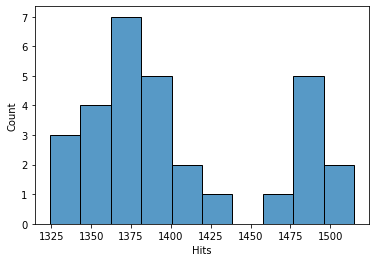

In [9]:
sns.histplot(df['Hits'], bins=10)

The number of hits in a game are the most with 1375 hits which occured 7 times out of 30.

<AxesSubplot:xlabel='Doubles', ylabel='Count'>

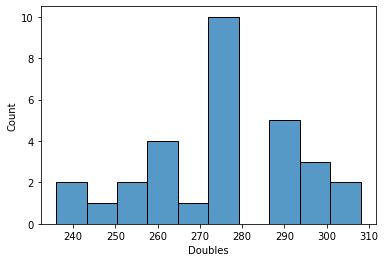

In [10]:
sns.histplot(df['Doubles'], bins=10)

Most doubles were scored in range from 273-279, that is 9 times.

<AxesSubplot:xlabel='Triples', ylabel='Count'>

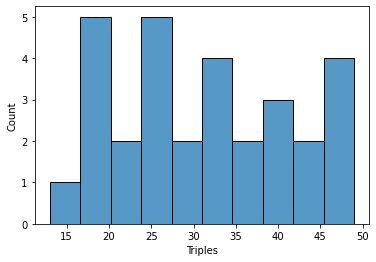

In [11]:
sns.histplot(df['Triples'], bins=10)

46-48 Triples were scored 4 times. Low triples score do have higher counts.

<AxesSubplot:xlabel='Homeruns', ylabel='Count'>

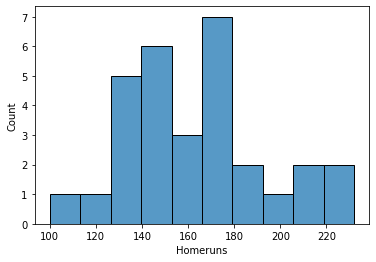

In [12]:
sns.histplot(df['Homeruns'], bins=10)

Only 4 home runs were hit from 210-233

<AxesSubplot:xlabel='Walks', ylabel='Count'>

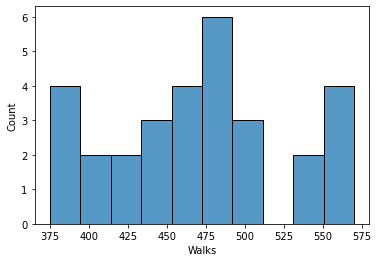

In [13]:
sns.histplot(df['Walks'], bins=10)

Most base are with 475 with 6 counts.

<AxesSubplot:xlabel='Strikeouts', ylabel='Count'>

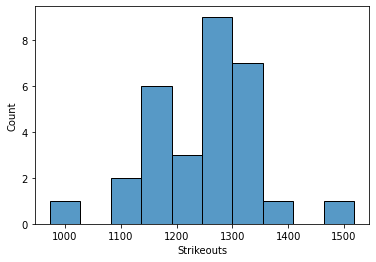

In [14]:
sns.histplot(df['Strikeouts'], bins=10)

Most Strikeouts are for 1250-1300 with 9 counts.

<AxesSubplot:xlabel='Stolen_Bases', ylabel='Count'>

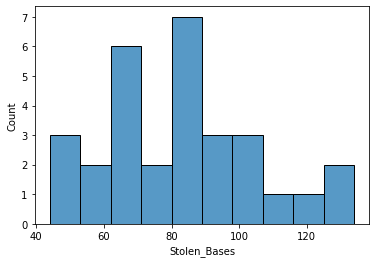

In [15]:
sns.histplot(df['Stolen_Bases'], bins=10)

Most Stolen_Bases are from 80-88 with 7 counts.

<AxesSubplot:xlabel='Runs_Allowed', ylabel='Count'>

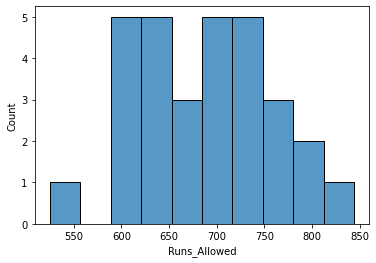

In [16]:
sns.histplot(df['Runs_Allowed'], bins=10)

There are more runs allowed. This is obvious due to the nature of the game. 

<AxesSubplot:xlabel='Earned_Runs', ylabel='Count'>

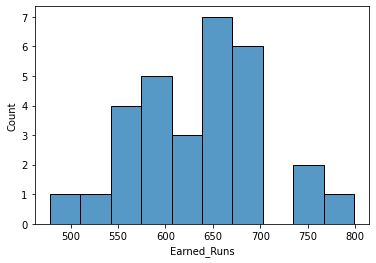

In [17]:
sns.histplot(df['Earned_Runs'], bins=10)

Same goes with Earned_runs, however, this column would have low values than Run_allowed.

<AxesSubplot:xlabel='Earned_Run_Average', ylabel='Count'>

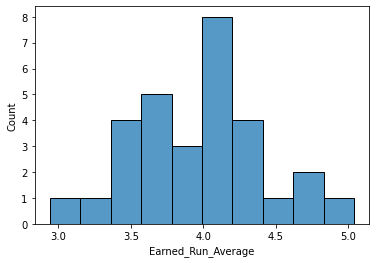

In [18]:
sns.histplot(df['Earned_Run_Average'], bins=10)

This has the same distribution as Earned_runs

<AxesSubplot:xlabel='Shutouts', ylabel='Count'>

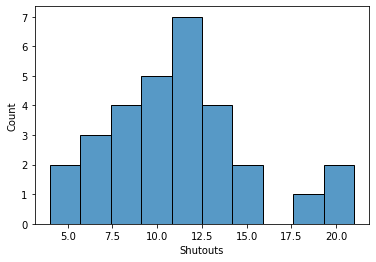

In [19]:
sns.histplot(df['Shutouts'], bins=10)

<AxesSubplot:xlabel='Errors', ylabel='Count'>

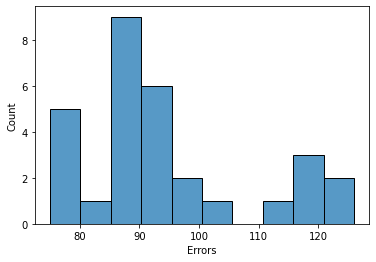

In [20]:
sns.histplot(df['Errors'], bins=10)

In [21]:
df.columns

Index(['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs',
       'Earned_Run_Average', 'Complete_Game', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

<AxesSubplot:xlabel='Wins', ylabel='Doubles'>

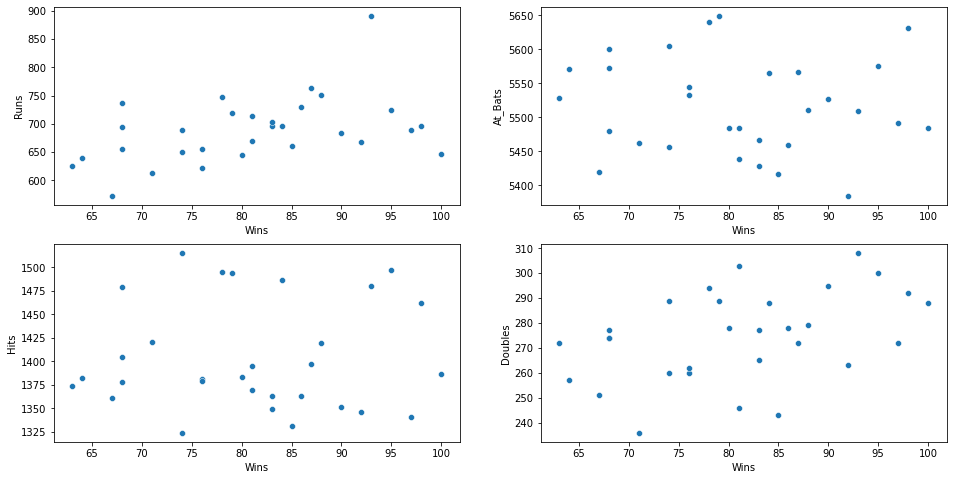

In [22]:
figure, axes = plt.subplots(2,2, figsize=(16,8))
sns.scatterplot(ax=axes[0,0], data=df, x= 'Wins', y= 'Runs')
sns.scatterplot(ax=axes[0,1], data=df, x= 'Wins', y= 'At_Bats')
sns.scatterplot(ax=axes[1,0], data=df, x= 'Wins', y= 'Hits')
sns.scatterplot(ax=axes[1,1], data=df, x= 'Wins', y= 'Doubles')


1) Only Runs have a slight trend increase in Wins, apart from that all the other features At_Bats, Hits and Doubles show no trend at all.<br>
2) We can assume that the these features are essential but not entirely dependent for more Wins.

<AxesSubplot:xlabel='Wins', ylabel='Strikeouts'>

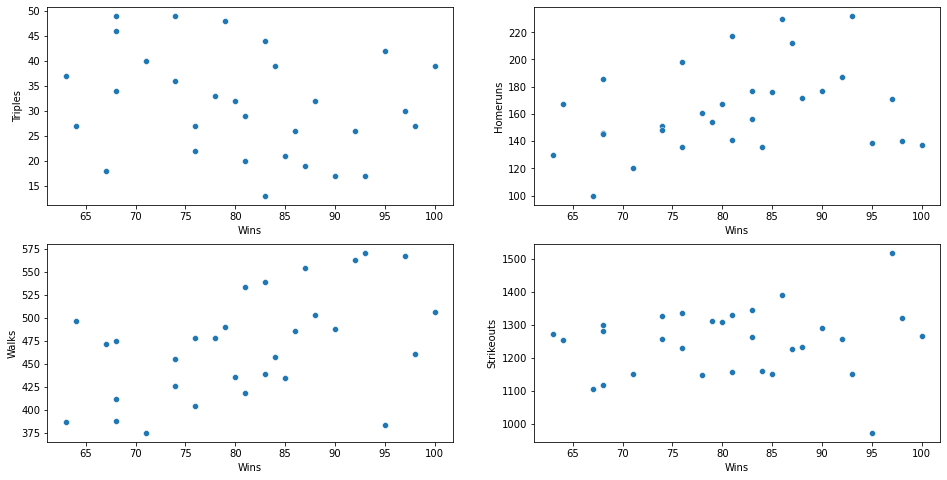

In [23]:
figure, axes = plt.subplots(2,2, figsize=(16,8))
sns.scatterplot(ax=axes[0,0], data=df, x= 'Wins', y= 'Triples')
sns.scatterplot(ax=axes[0,1], data=df, x= 'Wins', y= 'Homeruns')
sns.scatterplot(ax=axes[1,0], data=df, x= 'Wins', y= 'Walks')
sns.scatterplot(ax=axes[1,1], data=df, x= 'Wins', y= 'Strikeouts')

1) Homeruns, Walks and Strikeouts show slight uptrend same as Runs.<br>
2) Triples shows entries for low and high wins aswell. 

<AxesSubplot:xlabel='Wins', ylabel='Earned_Run_Average'>

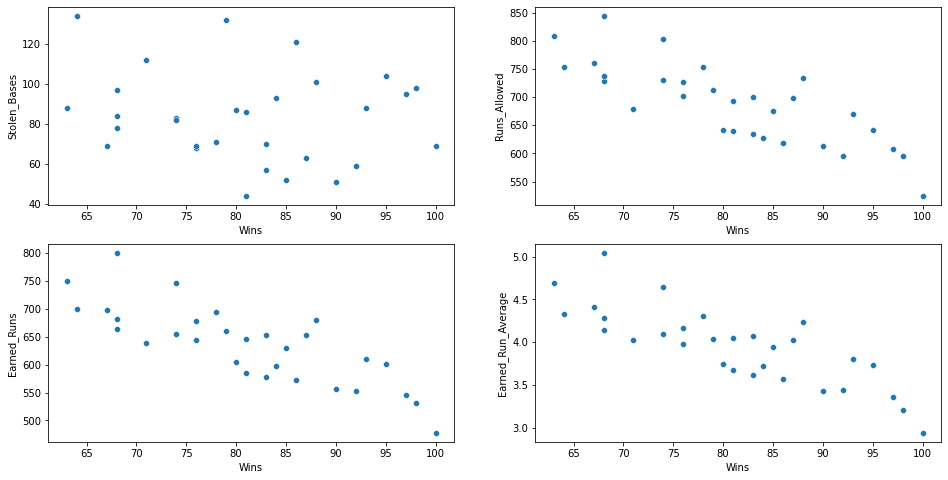

In [24]:
figure, axes = plt.subplots(2,2, figsize=(16,8))
sns.scatterplot(ax=axes[0,0], data=df, x= 'Wins', y= 'Stolen_Bases')
sns.scatterplot(ax=axes[0,1], data=df, x= 'Wins', y= 'Runs_Allowed')
sns.scatterplot(ax=axes[1,0], data=df, x= 'Wins', y= 'Earned_Runs')
sns.scatterplot(ax=axes[1,1], data=df, x= 'Wins', y= 'Earned_Run_Average')

All these features show negative trend, that is as the wins increase, Stolen_Bases, Runs_Allowed, Earned_Runs and Earned_Run_Average decrease.

<AxesSubplot:xlabel='Wins', ylabel='Errors'>

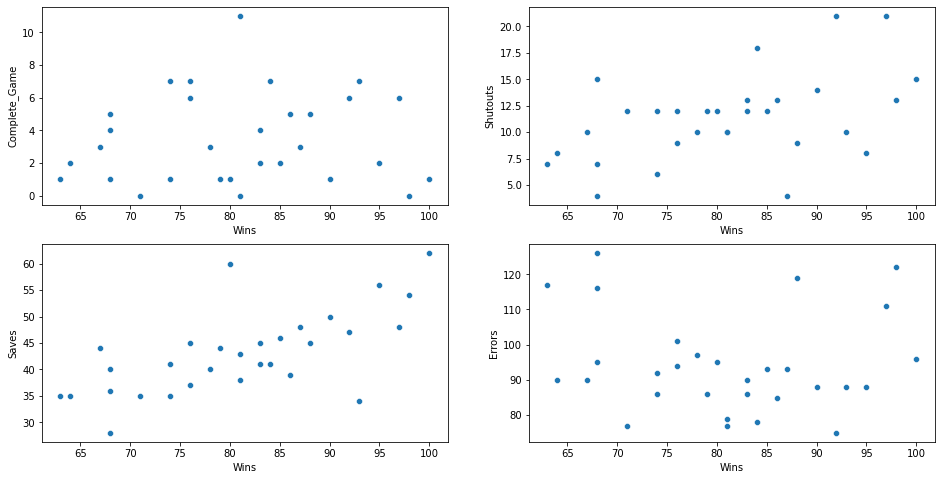

In [25]:
figure, axes = plt.subplots(2,2, figsize=(16,8))
sns.scatterplot(ax=axes[0,0], data=df, x= 'Wins', y= 'Complete_Game')
sns.scatterplot(ax=axes[0,1], data=df, x= 'Wins', y= 'Shutouts')
sns.scatterplot(ax=axes[1,0], data=df, x= 'Wins', y= 'Saves')
sns.scatterplot(ax=axes[1,1], data=df, x= 'Wins', y= 'Errors')

More Saves and Shutouts help increase the wins. 

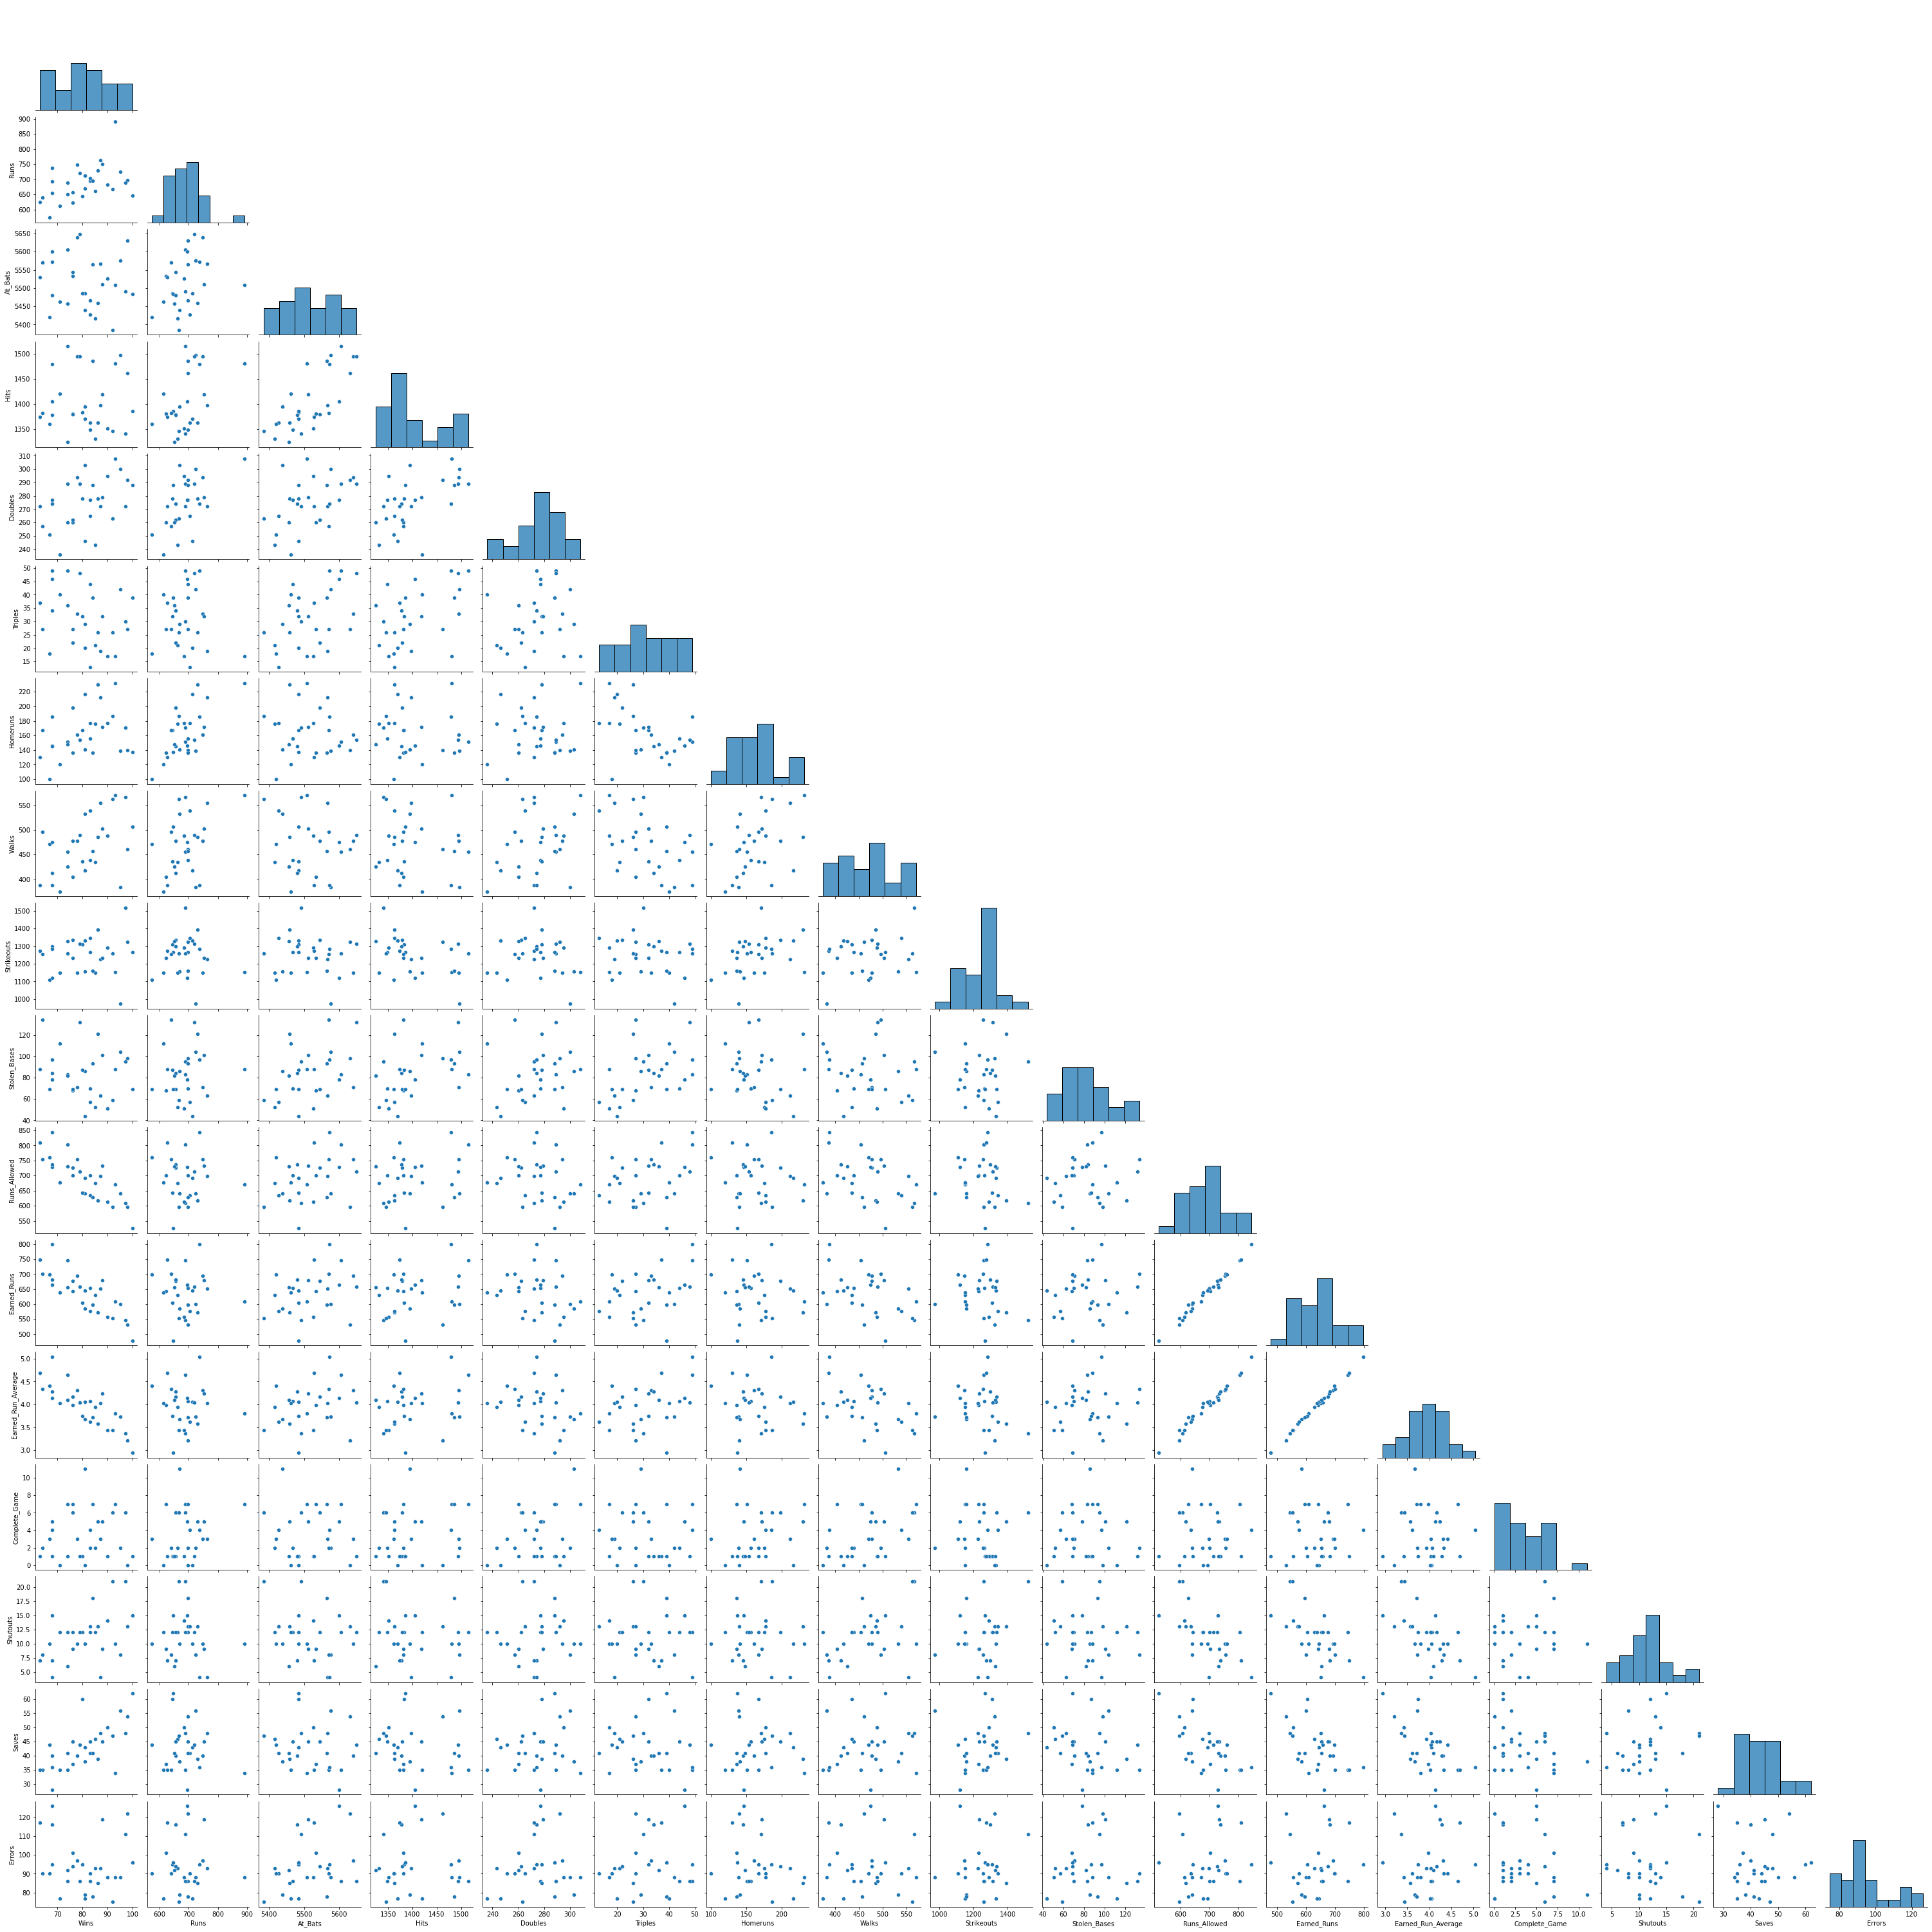

In [26]:
sns.pairplot(df, diag_kind="hist", corner=True)

<AxesSubplot:>

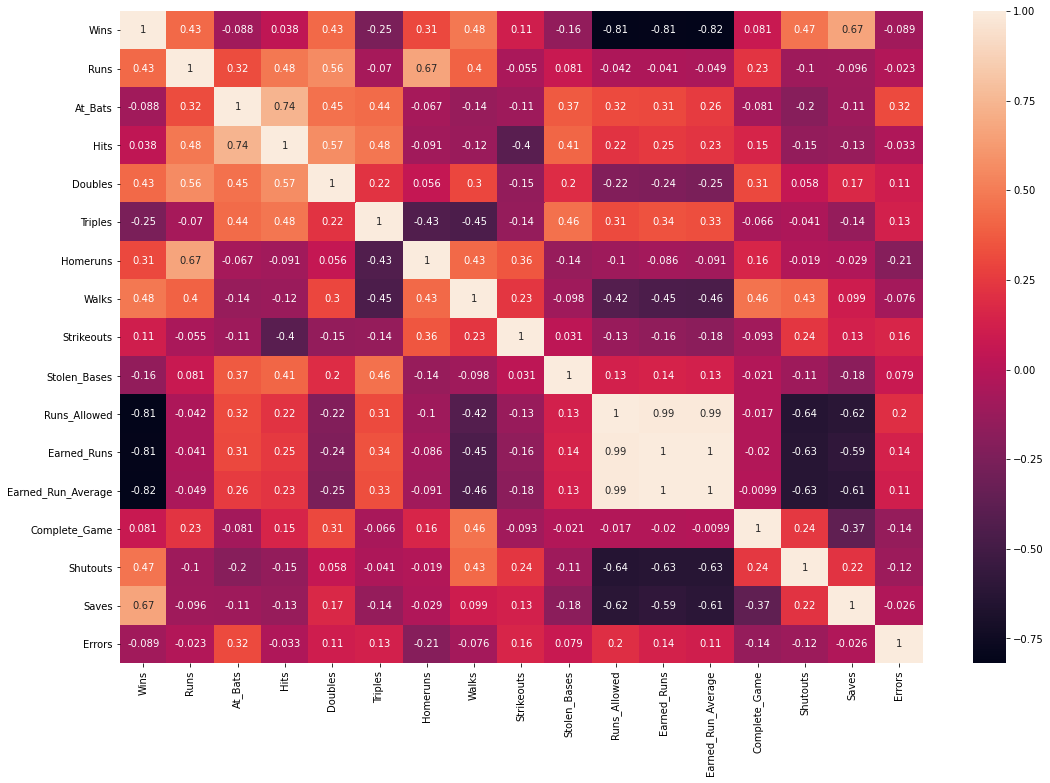

In [27]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=True)

Errors, Complete_Game ans At_bats have very low correlation we will drop them.

In [28]:
data = df.drop(['Errors','Complete_Game','At_Bats',], axis=1)

In [29]:
data.shape

(30, 14)

We will not remove outliers as we just have 30 entries. We will treat skewness for the columns<br>

# Treating Skewness

In [30]:
#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

In [31]:
#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

In [32]:
#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

In [33]:
#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

In [34]:
#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

In [35]:
#function for Cube root transformation Technique

def cuberoot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/3)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("cuberoot_transform")
        plt.show()

In [36]:
#function for Square root transformation Technique

def fifthroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/5)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("fifthroot_transform")
        plt.show()

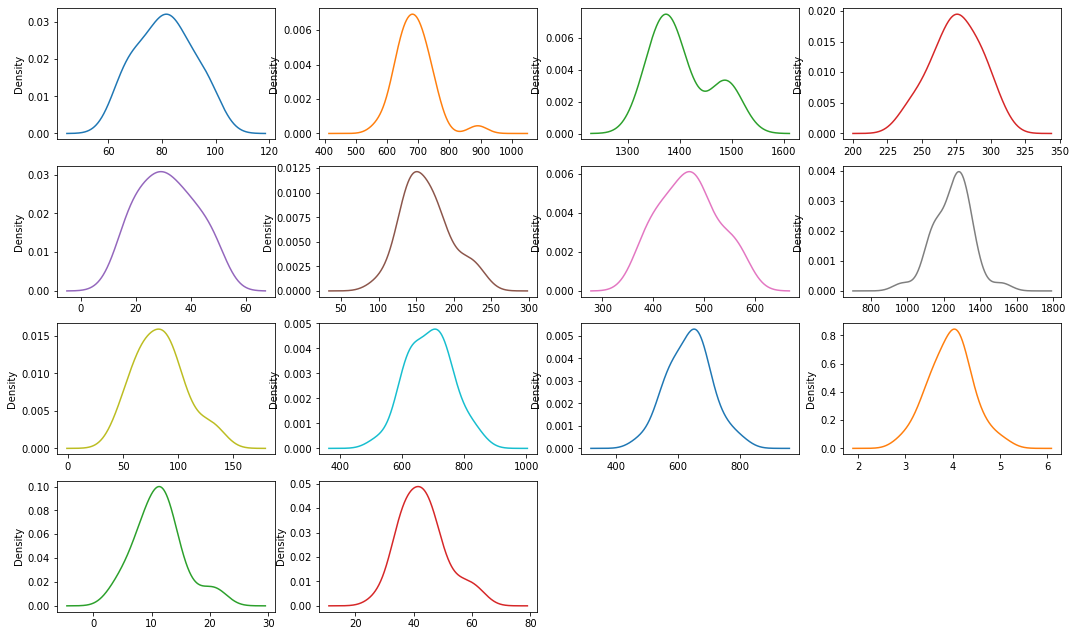

In [37]:
data.plot(kind="density", subplots =True, layout=(5,4), sharex=False, legend =False, figsize=(18,14))
plt.show()

In [38]:
data.skew()

Wins                  0.047089
Runs                  1.200786
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Homeruns              0.516441
Walks                 0.158498
Strikeouts           -0.156065
Stolen_Bases          0.479893
Runs_Allowed          0.045734
Earned_Runs           0.058710
Earned_Run_Average    0.053331
Shutouts              0.565790
Saves                 0.657524
dtype: float64

Runs, Hits and Saves are skewed. We will accept the skewness values for all the other columns.

## Column Runs

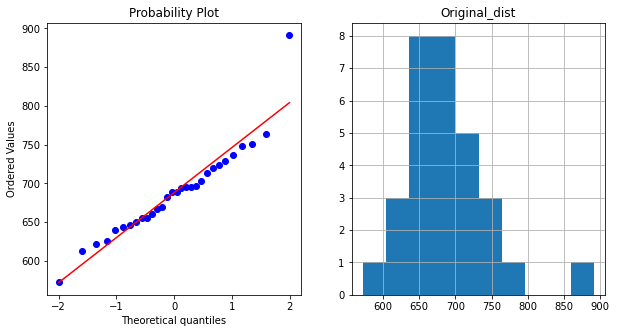

In [39]:
original_dist(data,'Runs')

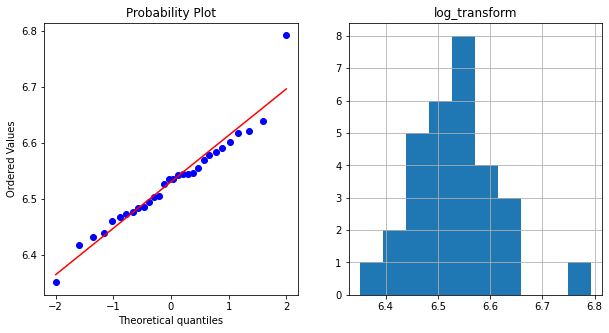

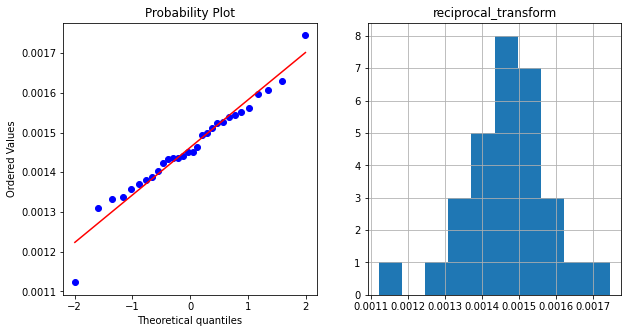

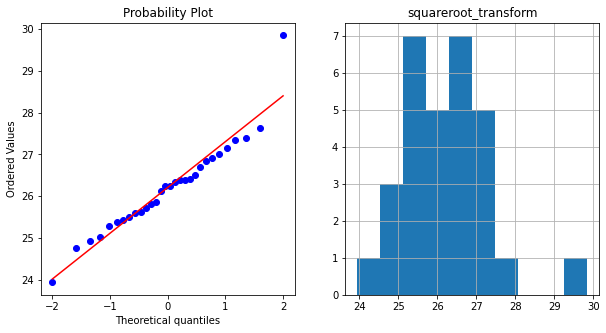

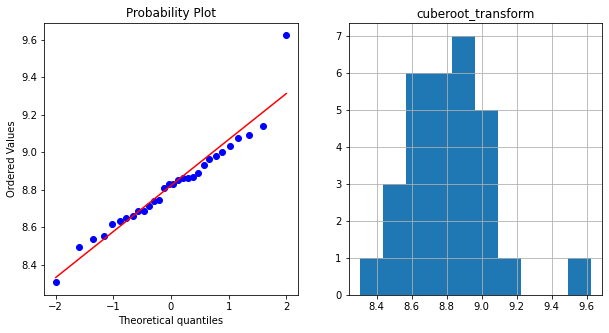

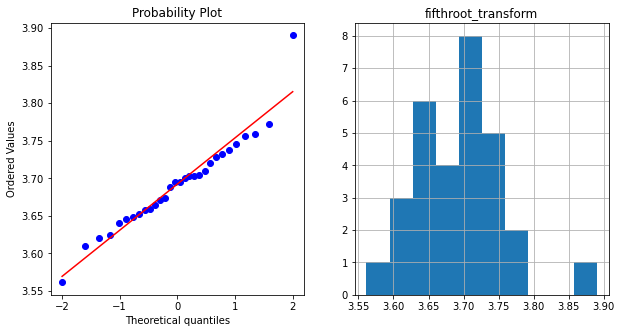

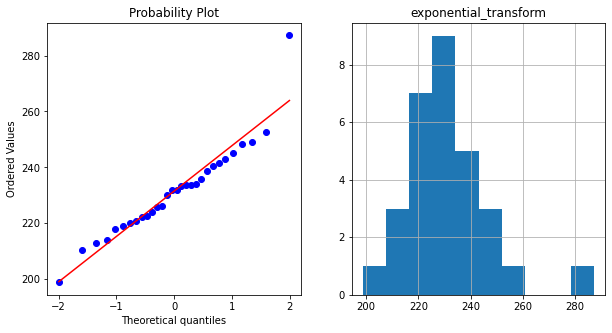

In [40]:
log_transform(data,'Runs')

reciprocal_transform(data,'Runs')

squareroot_transform(data,'Runs')

cuberoot_transform(data,'Runs')

fifthroot_transform(data,'Runs')

exponential_transform(data, 'Runs')

In [41]:
data['Runs'] = (1/data['Runs'])
data['Runs'].skew()

-0.31965571576014745

Treated skewness for Runs column.

## Column Hits

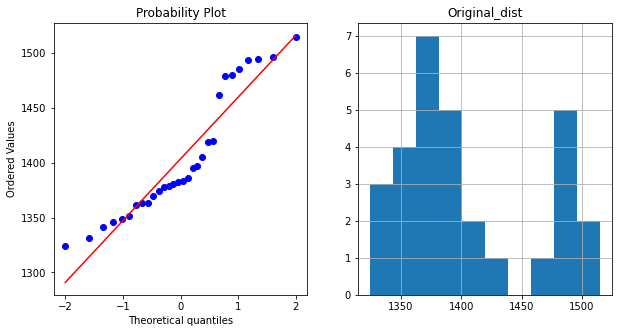

In [42]:
original_dist(data,'Hits')

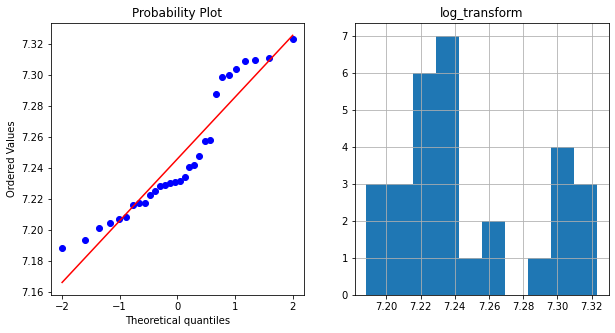

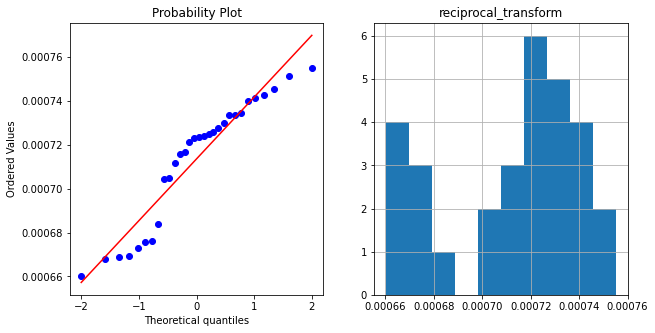

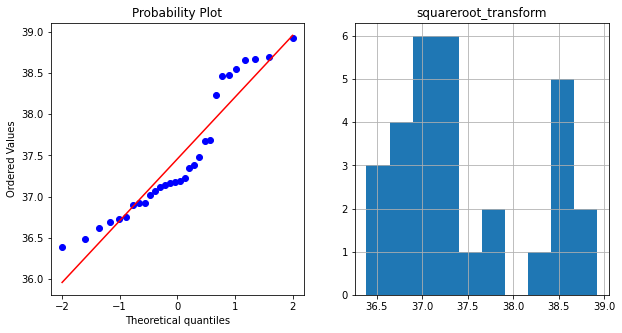

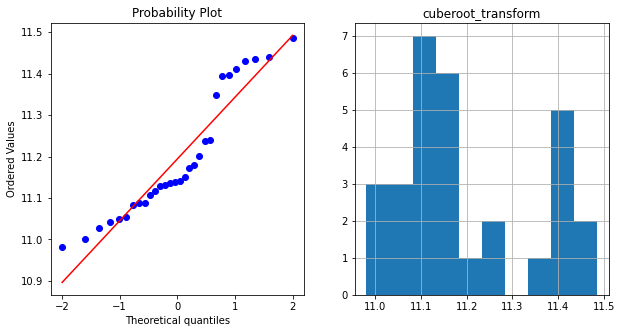

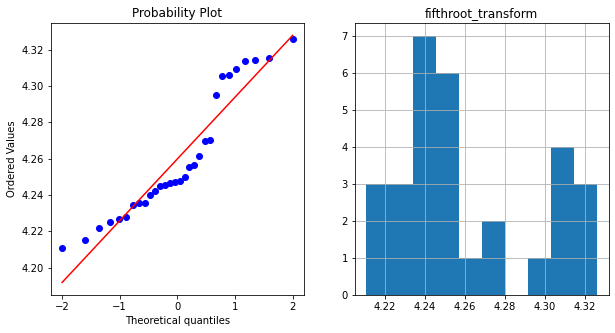

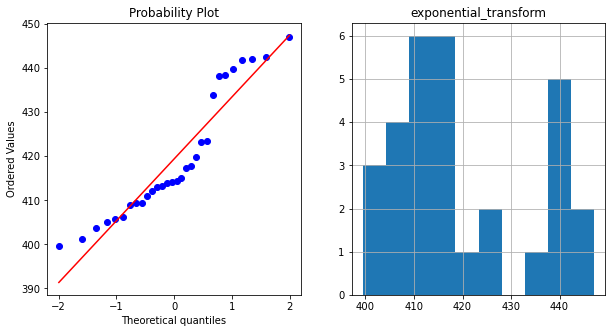

In [43]:
log_transform(data,'Hits')

reciprocal_transform(data,'Hits')

squareroot_transform(data,'Hits')

cuberoot_transform(data,'Hits')

fifthroot_transform(data,'Hits')

exponential_transform(data, 'Hits')

In [44]:
data['Hits']= (1/data['Hits'])
data['Hits'].skew()

-0.5855403936947804

Treated skewness for column Hits

## Column Saves

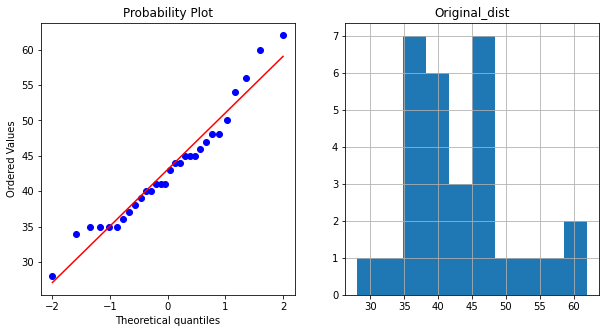

In [45]:
original_dist(data,'Saves')

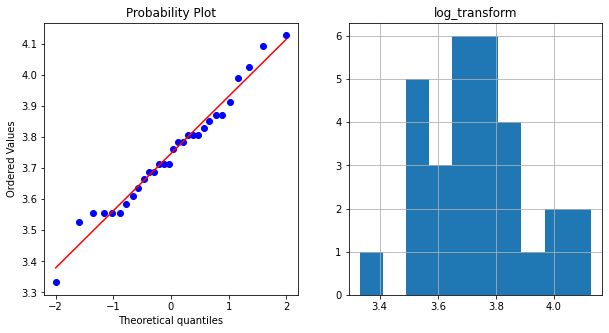

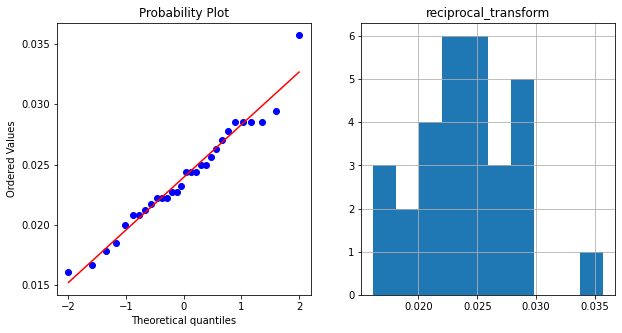

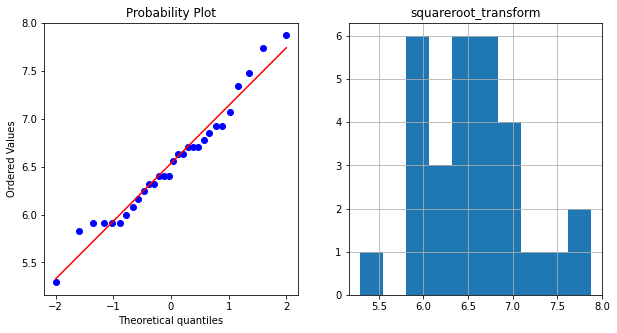

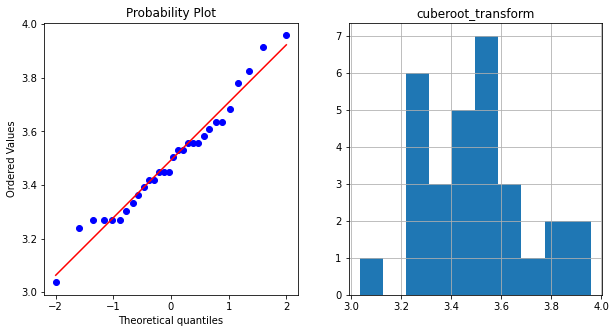

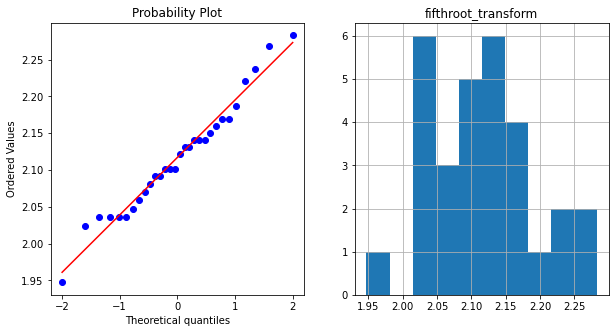

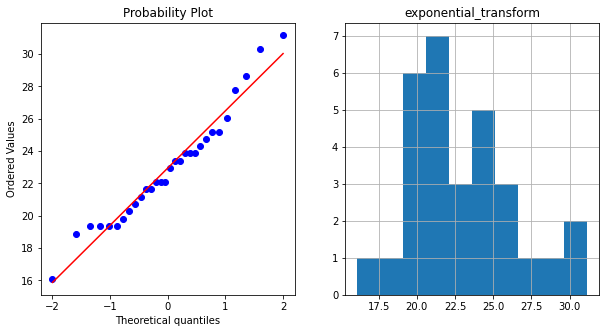

In [46]:
log_transform(data,'Saves')

reciprocal_transform(data,'Saves')

squareroot_transform(data,'Saves')

cuberoot_transform(data,'Saves')

fifthroot_transform(data,'Saves')

exponential_transform(data, 'Saves')

In [47]:
data['Saves'] = np.log(data['Saves'])
data['Saves'].skew()

0.15058249970623516

Skewness has been treated, let's divide the data.

In [48]:
x = data.drop('Wins', axis=1)
y = data['Wins']

Let's standardize the data

In [49]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

## Finding the best random state for the model


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
maxAccu = 0
maxRS = 0

for i in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = r2_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9534132523211208 on random state 162


Best Random state is 162

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=162)

## Best Algorithm for our problem.

In [55]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(lr.score(x_train,y_train))

mean_squared_error: 9.6538093801233
mean_absolute_error: 2.704664130421925
r2_score: 0.9534132523211208
0.8955005182765245


In [56]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(dt.score(x_train,y_train))

mean_squared_error: 197.5
mean_absolute_error: 12.833333333333334
r2_score: 0.046916890080428875
1.0


In [57]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(rf.score(x_train,y_train))

mean_squared_error: 71.06556666666665
mean_absolute_error: 6.913333333333334
r2_score: 0.6570562466487936
0.9075792800087537


In [58]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(kn.score(x_train,y_train))

mean_squared_error: 106.47999999999998
mean_absolute_error: 9.199999999999998
r2_score: 0.48615549597855234
0.6071972863551811


In [59]:
sv = SVR()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(sv.score(x_train,y_train))

mean_squared_error: 180.30814661668364
mean_absolute_error: 12.202295876554798
r2_score: 0.12988025761385902
0.27127021936797957


In [60]:
ab = AdaBoostRegressor()
ab.fit(x_train,y_train)
pred=ab.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(ab.score(x_train,y_train))

mean_squared_error: 94.89795918367345
mean_absolute_error: 8.571428571428571
r2_score: 0.5420473819554632
0.9859123007995189


In [61]:
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred=gb.predict(x_test)
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error:",mean_absolute_error(y_test,pred))
print("r2_score:",r2_score(y_test,pred))
print(gb.score(x_train,y_train))

mean_squared_error: 120.5582267308552
mean_absolute_error: 9.558283622307714
r2_score: 0.418217672612495
0.9999994587945163


Clearly, Linear Regression has the best perfomance. Let's Crossvalidate.

## Crossvalidation

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Linear Regression:", lrc.mean())

Cross validation score of Linear Regression: 0.221467448919742


In [64]:
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest:", rfc.mean())

Cross validation score of Random Forest: -0.5263273157473386


In [65]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree :", dtc.mean())

Cross validation score of Decision Tree : -2.06144294985784


In [66]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors:", knc.mean())

Cross validation score of Kneigbors: 0.031625400433435626


In [67]:
svc1 = cross_val_score(sv, x, y, cv=5)

print("Cross validation score of Support Vector:", svc1.mean())

Cross validation score of Support Vector: -0.3459901454243166


In [68]:
adr = cross_val_score(ab, x, y, cv=5)

print("Cross validation score of AdaBoost:", adr.mean())

Cross validation score of AdaBoost: -0.5340339447662581


In [69]:
gbr = cross_val_score(gb, x, y, cv=5)

print("Cross validation score of GradientBoost:", gbr.mean())

Cross validation score of GradientBoost: -1.0067608240682038


Linear Regression Stands out. Let's perform HyperParameter Tuning.

## Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
#Creating parameter list to pass in GridsearchCV

parameters = {'n_jobs': np.arange(1,10), 'copy_X':[True,False],
             'fit_intercept':[True,False], 'normalize':[True,False],'positive':[True,False]}

In [72]:
GCV = GridSearchCV(LinearRegression(), parameters, cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'normalize': [True, False],
                         'positive': [True, False]})

In [73]:
#Printing the best parameters.
GCV.best_params_

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': 1,
 'normalize': True,
 'positive': True}

## Model


In [74]:
model = LinearRegression(copy_X= True, fit_intercept=True, normalize=True, positive=True, n_jobs=1)
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(r2_score(y_test,pred)*100)

85.51070750295922


## Saving the Model

In [75]:
import joblib
joblib.dump(model,"baseball_submission.pkl")

['baseball_submission.pkl']